In [ ]:
#MLLAB4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer as YJ
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
data = pd.read_excel('/content/lab4data.xlsx')
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
data.describe

<bound method NDFrame.describe of         age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no>

In [ ]:
# Calculate the entropy of a set (H(S))
import math
def entropy(target_column):
    values = target_column.value_counts()
    total = len(target_column)
    entropy = 0
    for value in values:
        p = value / total
        entropy -= p * math.log2(p)
    return entropy

# Calculate Information Gain for a feature
def information_gain(data, feature, target):
    entropy_root = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[feature] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])
    return entropy_root - weighted_entropy

# Calculate Information Gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'

information_gains = {}
for feature in features:
    information_gains[feature] = information_gain(data, feature, target)

# Find the feature with the highest Information Gain
root_feature = max(information_gains, key=information_gains.get)
root_entropy = entropy(data[target])
root_information_gain = information_gains[root_feature]

print(f"Root Feature: {root_feature}")
print(f"Root Entropy: {root_entropy}")
print(f"Root Information Gain: {root_information_gain}")

Root Feature: age
Root Entropy: 0.9402859586706311
Root Information Gain: 0.24674981977443933


In [ ]:
#A2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()
for col in data.columns:
    if col != 'buys_computer':
        data[col] = le.fit_transform(data[col])

# Split data into features (X) and target (y)
X = data.drop('buys_computer', axis=1)
y = data['buys_computer']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Get the depth of the constructed tree
tree_depth = clf.tree_.max_depth

print(f"Depth of the Decision Tree: {tree_depth}")








Depth of the Decision Tree: 4


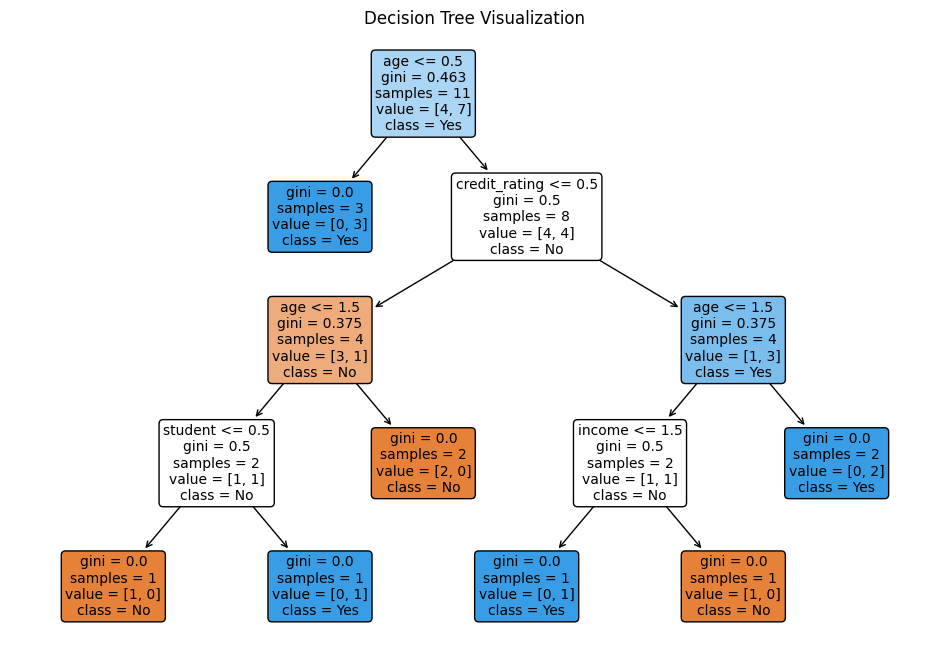

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Visualize the constructed tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#A4
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



model = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test,y_test)

0.6666666666666666

In [ ]:
#A5
model = DecisionTreeClassifier(max_depth=5)

In [ ]:
model = clf.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test,y_test)

0.6666666666666666

Training Accuracy (max_depth=3): 0.8181818181818182
Test Accuracy (max_depth=3): 0.6666666666666666


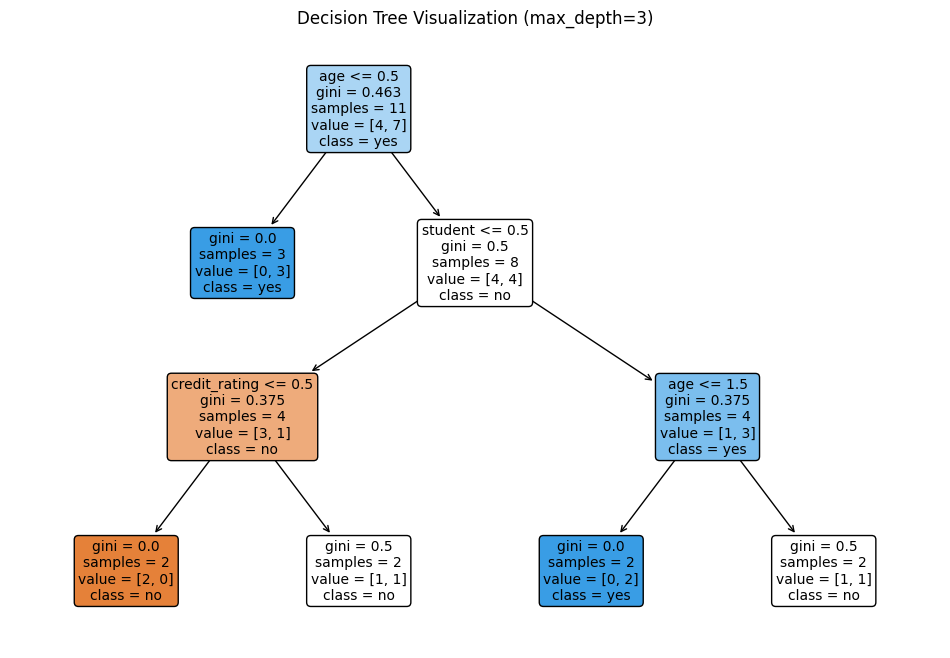

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = data.drop('buys_computer', axis=1)
y = data['buys_computer']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier with max_depth constraint
max_depth_constraint = 3  # Set your desired max depth
clf = DecisionTreeClassifier(max_depth=max_depth_constraint)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy (max_depth={max_depth_constraint}): {train_accuracy}")
print(f"Test Accuracy (max_depth={max_depth_constraint}): {test_accuracy}")

# Visualize the constructed tree with max_depth constraint
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree Visualization (max_depth={max_depth_constraint})")
plt.show()

Training Accuracy (Criterion: Entropy): 1.0
Test Accuracy (Criterion: Entropy): 1.0


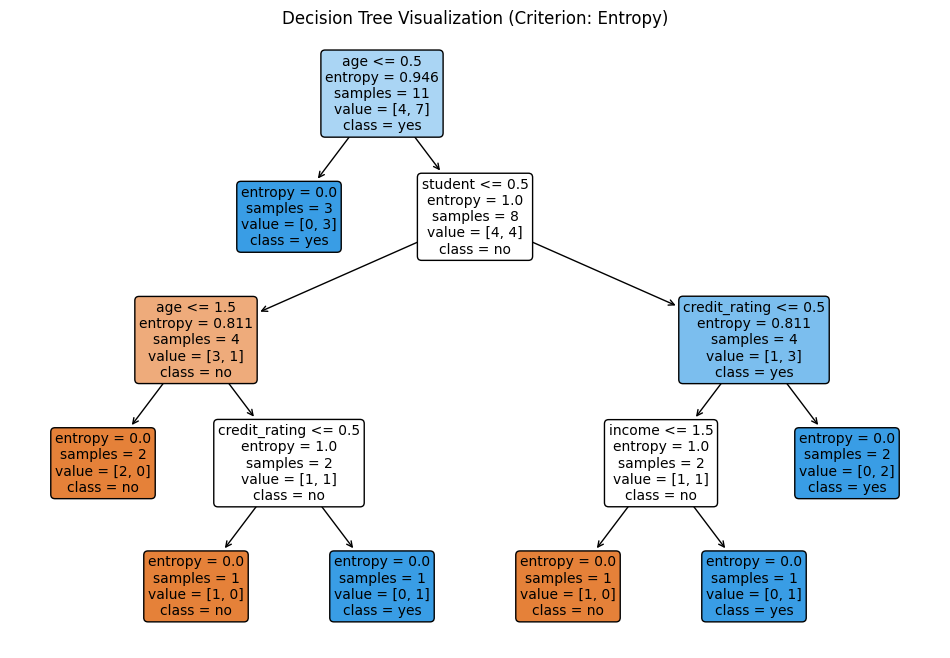

In [18]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Fit the model on the training data
clf_entropy.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred_entropy = clf_entropy.predict(X_train)
y_test_pred_entropy = clf_entropy.predict(X_test)

# Calculate accuracy for training and test data using "entropy" criterion
train_accuracy_entropy = accuracy_score(y_train, y_train_pred_entropy)
test_accuracy_entropy = accuracy_score(y_test, y_test_pred_entropy)

# Print the accuracies using "entropy" criterion
print(f"Training Accuracy (Criterion: Entropy): {train_accuracy_entropy}")
print(f"Test Accuracy (Criterion: Entropy): {test_accuracy_entropy}")

# Visualize the constructed tree with "entropy" criterion
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=X.columns, class_names=clf_entropy.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Criterion: Entropy)")
plt.show()

In [ ]:
#A6
